# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [177]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [178]:
#renaming enrollment totals by category columns
df.rename({
    'GRADES_PK_G':'NUM_ENROLL_PREK',
    'GRADES_KG_G':'NUM_ENROLL_KINDER',
    'GRADES_4_G':'NUM_ENROLL_4',
    'GRADES_8_G':'NUM_ENROLL_8',
    'GRADES_12_G':'NUM_ENROLL_12',
    'GRADES_1_8_G':'NUM_ENROLL_PRIMARY',
    'GRADES_9_12_G':'NUM_ENROLL_HS',
    'GRADES_ALL_G':'NUM_ENROLL_ALL',
    'ENROLL':'NUM_ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
#inplace return copy of dataframe



In [179]:
# checking number of missing values of each column
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
NUM_ENROLL_ALL_EST               491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
NUM_ENROLL_PREK                  173
NUM_ENROLL_KINDER                 83
NUM_ENROLL_4                      83
NUM_ENROLL_8                      83
NUM_ENROLL_12                     83
NUM_ENROLL_PRIMARY               695
NUM_ENROLL_HS                    644
NUM_ENROLL_ALL                    83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

<AxesSubplot: title={'center': 'Grade 4 Math Score Distribution'}, ylabel='Density'>

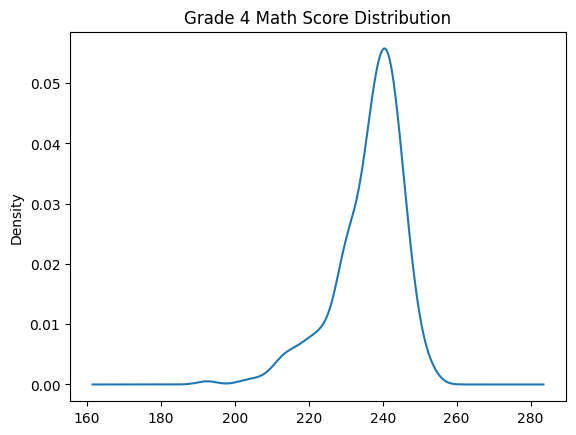

In [180]:

#checking to see if using the median or mean will be a more appropriate method to replace missing values with a graph
df["AVG_MATH_4_SCORE"].plot.kde(title="Grade 4 Math Score Distribution")

In [181]:
#because the data is skewed left I will use the column's median to fill in missing values
df["AVG_MATH_4_SCORE"].fillna(df["AVG_MATH_4_SCORE"].median(), inplace=True)

In [182]:
#data missing in NUM_ENROLL_ALL is also missing all other enrollment data
df[df["NUM_ENROLL_ALL"].isna()][['NUM_ENROLL_PREK','NUM_ENROLL_PRIMARY','NUM_ENROLL_HS','NUM_ENROLL_ALL_EST']].notna().any()

NUM_ENROLL_PREK       False
NUM_ENROLL_PRIMARY    False
NUM_ENROLL_HS         False
NUM_ENROLL_ALL_EST    False
dtype: bool

In [183]:
# there are rows with enrollment estimates in rows missing non-estimate enrollment total
df[df.NUM_ENROLL_ALL_EST.isna()]["NUM_ENROLL_ALL"].notna().sum()

408

In [184]:
#checking to see if average error between estimated and actual enrollment is small enough to fill in missing NUM_ENROLL_ALL with enrollment estimates
((df["NUM_ENROLL_ALL"] - df["NUM_ENROLL_ALL_EST"])/df["NUM_ENROLL_ALL"]).describe()

count    1224.000000
mean        0.026646
std         0.054345
min        -0.096404
25%         0.004408
50%         0.014764
75%         0.030539
max         0.482156
dtype: float64

In [185]:
#since the average error is ~2%, I will use it to fill in the missing estimates
df["NUM_ENROLL_ALL_EST"] = df["NUM_ENROLL_ALL_EST"].fillna(df["NUM_ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 4 Math*

How many years of data are logged in our dataset? 

In [186]:
#getting number of unique years
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [187]:
#getting the average math score for 4th grade by state
df.groupby('STATE')["AVG_MATH_4_SCORE"].mean()

STATE
ALABAMA                 234.030303
ALASKA                  237.121212
ARIZONA                 235.636364
ARKANSAS                235.848485
CALIFORNIA              234.636364
COLORADO                238.424242
CONNECTICUT             238.636364
DELAWARE                237.757576
DISTRICT_OF_COLUMBIA    230.848485
DODEA                   240.250000
FLORIDA                 238.242424
GEORGIA                 236.181818
HAWAII                  236.060606
IDAHO                   237.666667
ILLINOIS                237.212121
INDIANA                 239.060606
IOWA                    238.696970
KANSAS                  239.393939
KENTUCKY                236.545455
LOUISIANA               234.212121
MAINE                   238.666667
MARYLAND                237.606061
MASSACHUSETTS           240.666667
MICHIGAN                236.787879
MINNESOTA               240.333333
MISSISSIPPI             234.090909
MISSOURI                237.363636
MONTANA                 238.727273
NATIONAL      

236.787879 < 238.484848 so Ohio has a higher average outcome across all years
Ohio

Find the average for your outcome score across all states in 2019

In [189]:
#creating an object that groups the original dataframe by year
by_year = df.groupby('YEAR')
#calculating the average score by year across all states
by_year['AVG_MATH_4_SCORE'].mean()

YEAR
1986    238.000000
1987    238.000000
1988    238.000000
1989    238.000000
1990    237.528302
1991    238.000000
1992    222.113208
1993    238.000000
1994    238.000000
1995    238.000000
1996    237.735849
1997    238.000000
1998    238.000000
1999    238.000000
2000    226.622642
2001    238.000000
2002    238.000000
2003    234.000000
2004    238.000000
2005    237.169811
2006    238.000000
2007    239.207547
2008    238.000000
2009    239.547170
2010    238.000000
2011    240.490566
2012    238.000000
2013    241.962264
2014    238.000000
2015    240.415094
2016    238.000000
2017    239.433962
2019    239.943396
Name: AVG_MATH_4_SCORE, dtype: float64

In [190]:
#according to the output the average for 2019 is 239.943396
239.943396

239.943396

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [191]:
#the last column of the describe() output has the max
#grouping by state and then applying describe() on the AVG_MATH_4_SCORE column will get the results
#look at the last column for the solution
df.groupby('STATE')["AVG_MATH_4_SCORE"].describe()

,count,mean,std,min,25%,50%,75%,max
STATE,,,,,,,,
ALABAMA,33.0,234.030303,7.112862,208.0,231.00,238.0,238.0,238.0
ALASKA,33.0,237.121212,1.916337,230.0,237.00,238.0,238.0,238.0
ARIZONA,33.0,235.636364,5.532959,215.0,238.00,238.0,238.0,240.0
ARKANSAS,33.0,235.848485,6.260597,210.0,238.00,238.0,238.0,240.0
CALIFORNIA,33.0,234.636364,6.958889,208.0,234.00,238.0,238.0,238.0
COLORADO,33.0,238.424242,3.873228,221.0,238.00,238.0,238.0,247.0
CONNECTICUT,33.0,238.636364,3.029214,227.0,238.00,238.0,239.0,245.0
DELAWARE,33.0,237.757576,3.783437,218.0,238.00,238.0,238.0,243.0
DISTRICT_OF_COLUMBIA,33.0,230.848485,13.290319,192.0,231.00,238.0,238.0,238.0


look at the last column in the output above for the solution

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [192]:
#seeing what columns there are
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'NUM_ENROLL_ALL_EST', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'NUM_ENROLL_PREK', 'NUM_ENROLL_KINDER',
       'NUM_ENROLL_4', 'NUM_ENROLL_8', 'NUM_ENROLL_12', 'NUM_ENROLL_PRIMARY',
       'NUM_ENROLL_HS', 'NUM_ENROLL_ALL', 'AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [193]:
#creatinig new columns which represents expenditure types per student
df['TOTAL_EXPENDITURE_PER_STUDENT'] = df['TOTAL_EXPENDITURE'] / df['NUM_ENROLL_ALL']
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['NUM_ENROLL_ALL']
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['NUM_ENROLL_ALL']

#creating a new column for revenue types per student
df['TOTAL_REVENUE_PER_STUDENT'] = df['TOTAL_REVENUE'] / df['NUM_ENROLL_ALL']
df['LOCAL_REVENUE'] = df['LOCAL_REVENUE'] / df['NUM_ENROLL_ALL']



Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

I standardized the monetary data (both expenditures and revenue) per student, because some states like California probably spend and have more than New Jersey, but part of the difference in funds is accounted for by the number of students.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot: title={'center': 'Average 4th Grade Math Scores vs Total Expenditure Per Student'}, xlabel='TOTAL_EXPENDITURE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

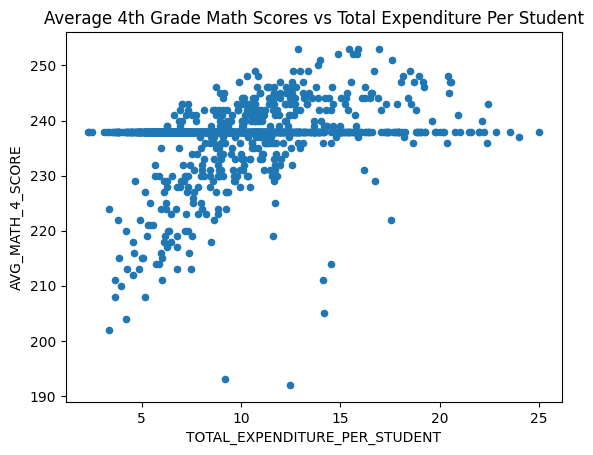

In [194]:
#I will investigate the relationship between average 4th grade math scores and total revenue per student
#I will use a scatter plot because both variables are continuous
df.plot.scatter(x="TOTAL_EXPENDITURE_PER_STUDENT", y="AVG_MATH_4_SCORE", title="Average 4th Grade Math Scores vs Total Expenditure Per Student")

**<CAPTION FOR VIZ 1>** It seems as though average 4th grade math scores and total expenditure per student are correlated. The horizontal line of dots around the 4th grade math average score of 237 can be explained by putting the median into rows with a missing value.

**Visualization 2**

<AxesSubplot: title={'center': 'Average 4th Grade Math Scores vs Total Revenue Per Student'}, xlabel='TOTAL_REVENUE_PER_STUDENT', ylabel='AVG_MATH_4_SCORE'>

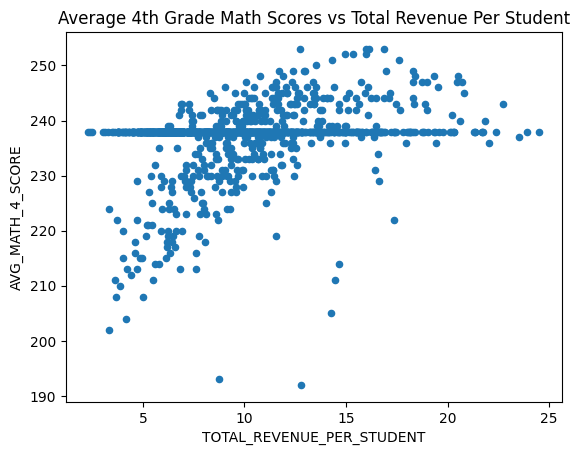

In [195]:
#I will investigate the relationship between average 4th grade math scores and total expenditure per student
df.plot.scatter(x="TOTAL_REVENUE_PER_STUDENT", y="AVG_MATH_4_SCORE", title="Average 4th Grade Math Scores vs Total Revenue Per Student")

**<CAPTION FOR VIZ 2>** Though there are a few outliers, it does seem like total revenue per student and average fourth grade math scores are correlated. Again, the line around the score of 237 can be explained by replacing rows with missing values with the median.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
# X will be used to denote the input data
# y will be used for the response / output data
# to deal with missing values in the input data, I used .dropna()
X = df[[TOTAL_REVENUE_PER_STUDENT','TOTAL_EXPENDITURE_PER_STUDENT']].dropna()
y = df.loc[X.index]['AVG_MATH_4_SCORE']

SyntaxError: unterminated string literal (detected at line 4) (278446814.py, line 4)

In [198]:
# making sure that y will not have any Nan
y.fillna(y.median(), inplace=True)

In [199]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

#I will use the classic 70 / 30 train / test split
#I wil set the random_state explicitly to sure I get the same results every time I run my code

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=0)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [200]:
# import your sklearn class here
# I will use linear regression, because each visualization depicted a pretty linear relationship between the variables
from sklearn.linear_model import LinearRegression

In [201]:
# my model 
model = LinearRegression()

In [202]:
# training the data
model.fit(X_train, y_train)

LinearRegression()

In [203]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [204]:
# looking at the R^2 value to see how well my linear model firts the data
model.score(X_test, y_test)

0.0833778027896116

In [205]:
# looking at the root mean squared error
np.mean((model.predict(X_test)-y_test)**2)**0.5

6.206871340488391

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

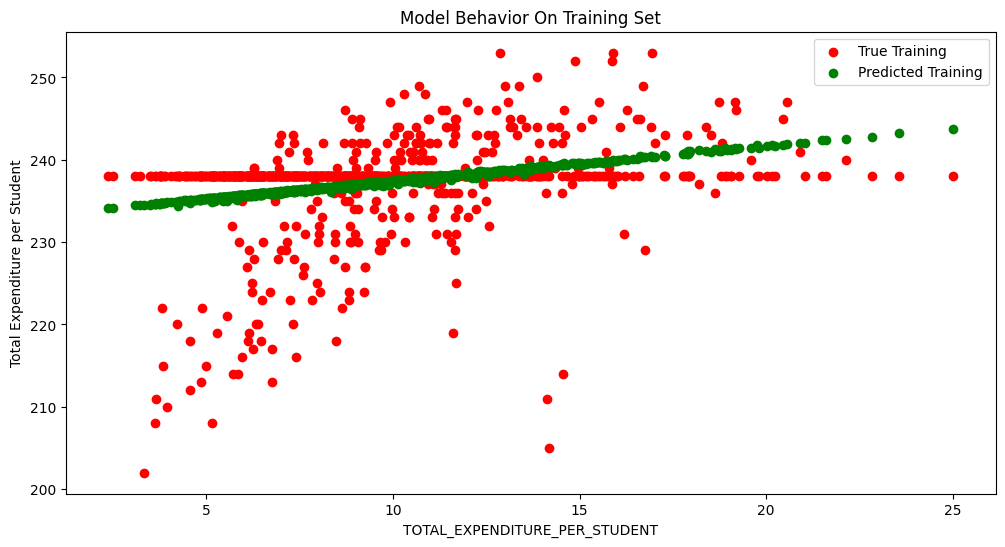

In [206]:
col_name = 'TOTAL_EXPENDITURE_PER_STUDENT'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Total Expenditure per Student')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

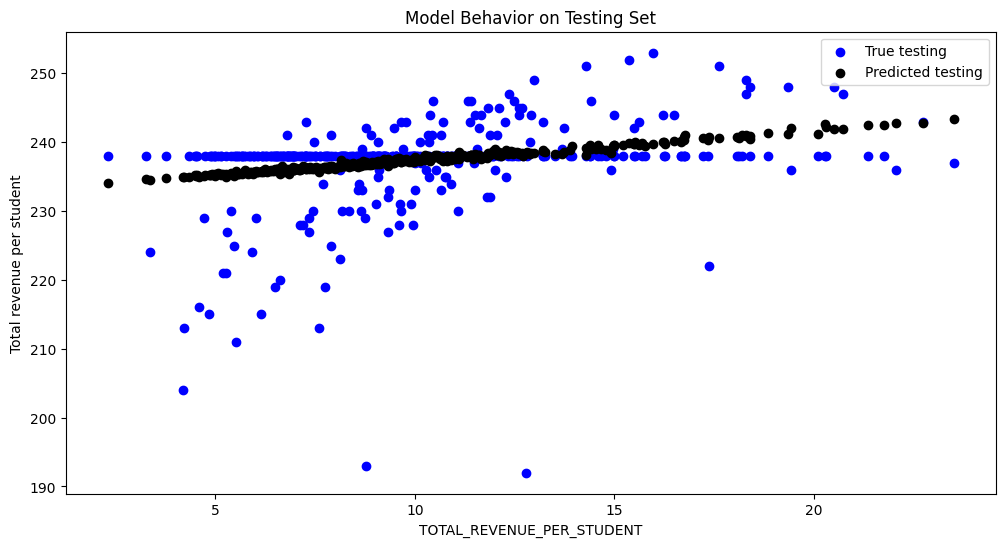

In [209]:
col_name = "TOTAL_REVENUE_PER_STUDENT"

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Total revenue per student')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**
In this checkpoint, I cleaned and manipulated data to see if I could find a way to predict average fourth grade math scores. I used the sklearn class's implementation of linear regression to do so. The model I created was not very functional; the r^2 value and the root mean squared error were far from ideal. I believe that they were as bad as they were because of the proportionately vast number of missing values I replaced with the median. From both "Model Behavior on Testing Set" graphs, it is evident that I replaced a lot of missing values in the original data and that final predictive model was more influenced by the artificial values than the original values that existed in the original data set. Though my model did not perform well, I predict that total expenditure per student and total revenue per student are still fair ways of predicting average fourth grade math scores based on the general trend of points that did not have a average 4th grade math score of around 237 on the visualizations.